In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

In [94]:
data = pd.read_csv("Phishing.csv")
data.head()

,index,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,0,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,2,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,3,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,4,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [95]:
data.shape

(22110, 32)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22110 entries, 0 to 22109
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        22110 non-null  int64
 1   having_IP_Address            22110 non-null  int64
 2   URL_Length                   22110 non-null  int64
 3   Shortining_Service           22110 non-null  int64
 4   having_At_Symbol             22110 non-null  int64
 5   double_slash_redirecting     22110 non-null  int64
 6   Prefix_Suffix                22110 non-null  int64
 7   having_Sub_Domain            22110 non-null  int64
 8   SSLfinal_State               22110 non-null  int64
 9   Domain_registeration_length  22110 non-null  int64
 10  Favicon                      22110 non-null  int64
 11  port                         22110 non-null  int64
 12  HTTPS_token                  22110 non-null  int64
 13  Request_URL                  22110 non-null  i

In [97]:
data.nunique()

index                          22110
having_IP_Address                  2
URL_Length                         3
Shortining_Service                 2
having_At_Symbol                   2
double_slash_redirecting           2
Prefix_Suffix                      2
having_Sub_Domain                  3
SSLfinal_State                     3
Domain_registeration_length        2
Favicon                            2
port                               2
HTTPS_token                        2
Request_URL                        2
URL_of_Anchor                      3
Links_in_tags                      3
SFH                                3
Submitting_to_email                2
Abnormal_URL                       2
Redirect                           2
on_mouseover                       2
RightClick                         2
popUpWidnow                        2
Iframe                             2
age_of_domain                      2
DNSRecord                          2
web_traffic                        3
P

In [98]:
data = data.drop(['index'] , axis =1)

In [99]:
data.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,22110.000000,22110.000000,22110.000000,22110.000000,22110.000000,22110.000000,22110.000000,22110.000000,22110.000000,22110.000000,...,22110.000000,22110.000000,22110.000000,22110.000000,22110.000000,22110.000000,22110.000000,22110.000000,22110.000000,22110.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949512,0.766078,0.673983,0.713582,0.670996,0.678124,0.817500,0.911872,0.941608,0.777759,...,0.789800,0.576771,0.998146,0.926188,0.827715,0.875269,0.692353,0.569931,0.694421,0.993516
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
having_IP_Address,22110.0,0.313795,0.949512,-1.0,-1.0,1.0,1.0,1.0
URL_Length,22110.0,-0.633198,0.766078,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,22110.0,0.738761,0.673983,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,22110.0,0.700588,0.713582,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,22110.0,0.741474,0.670996,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,22110.0,-0.734962,0.678124,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,22110.0,0.063953,0.817500,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,22110.0,0.250927,0.911872,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,22110.0,-0.336771,0.941608,-1.0,-1.0,-1.0,1.0,1.0
Favicon,22110.0,0.628584,0.777759,-1.0,1.0,1.0,1.0,1.0


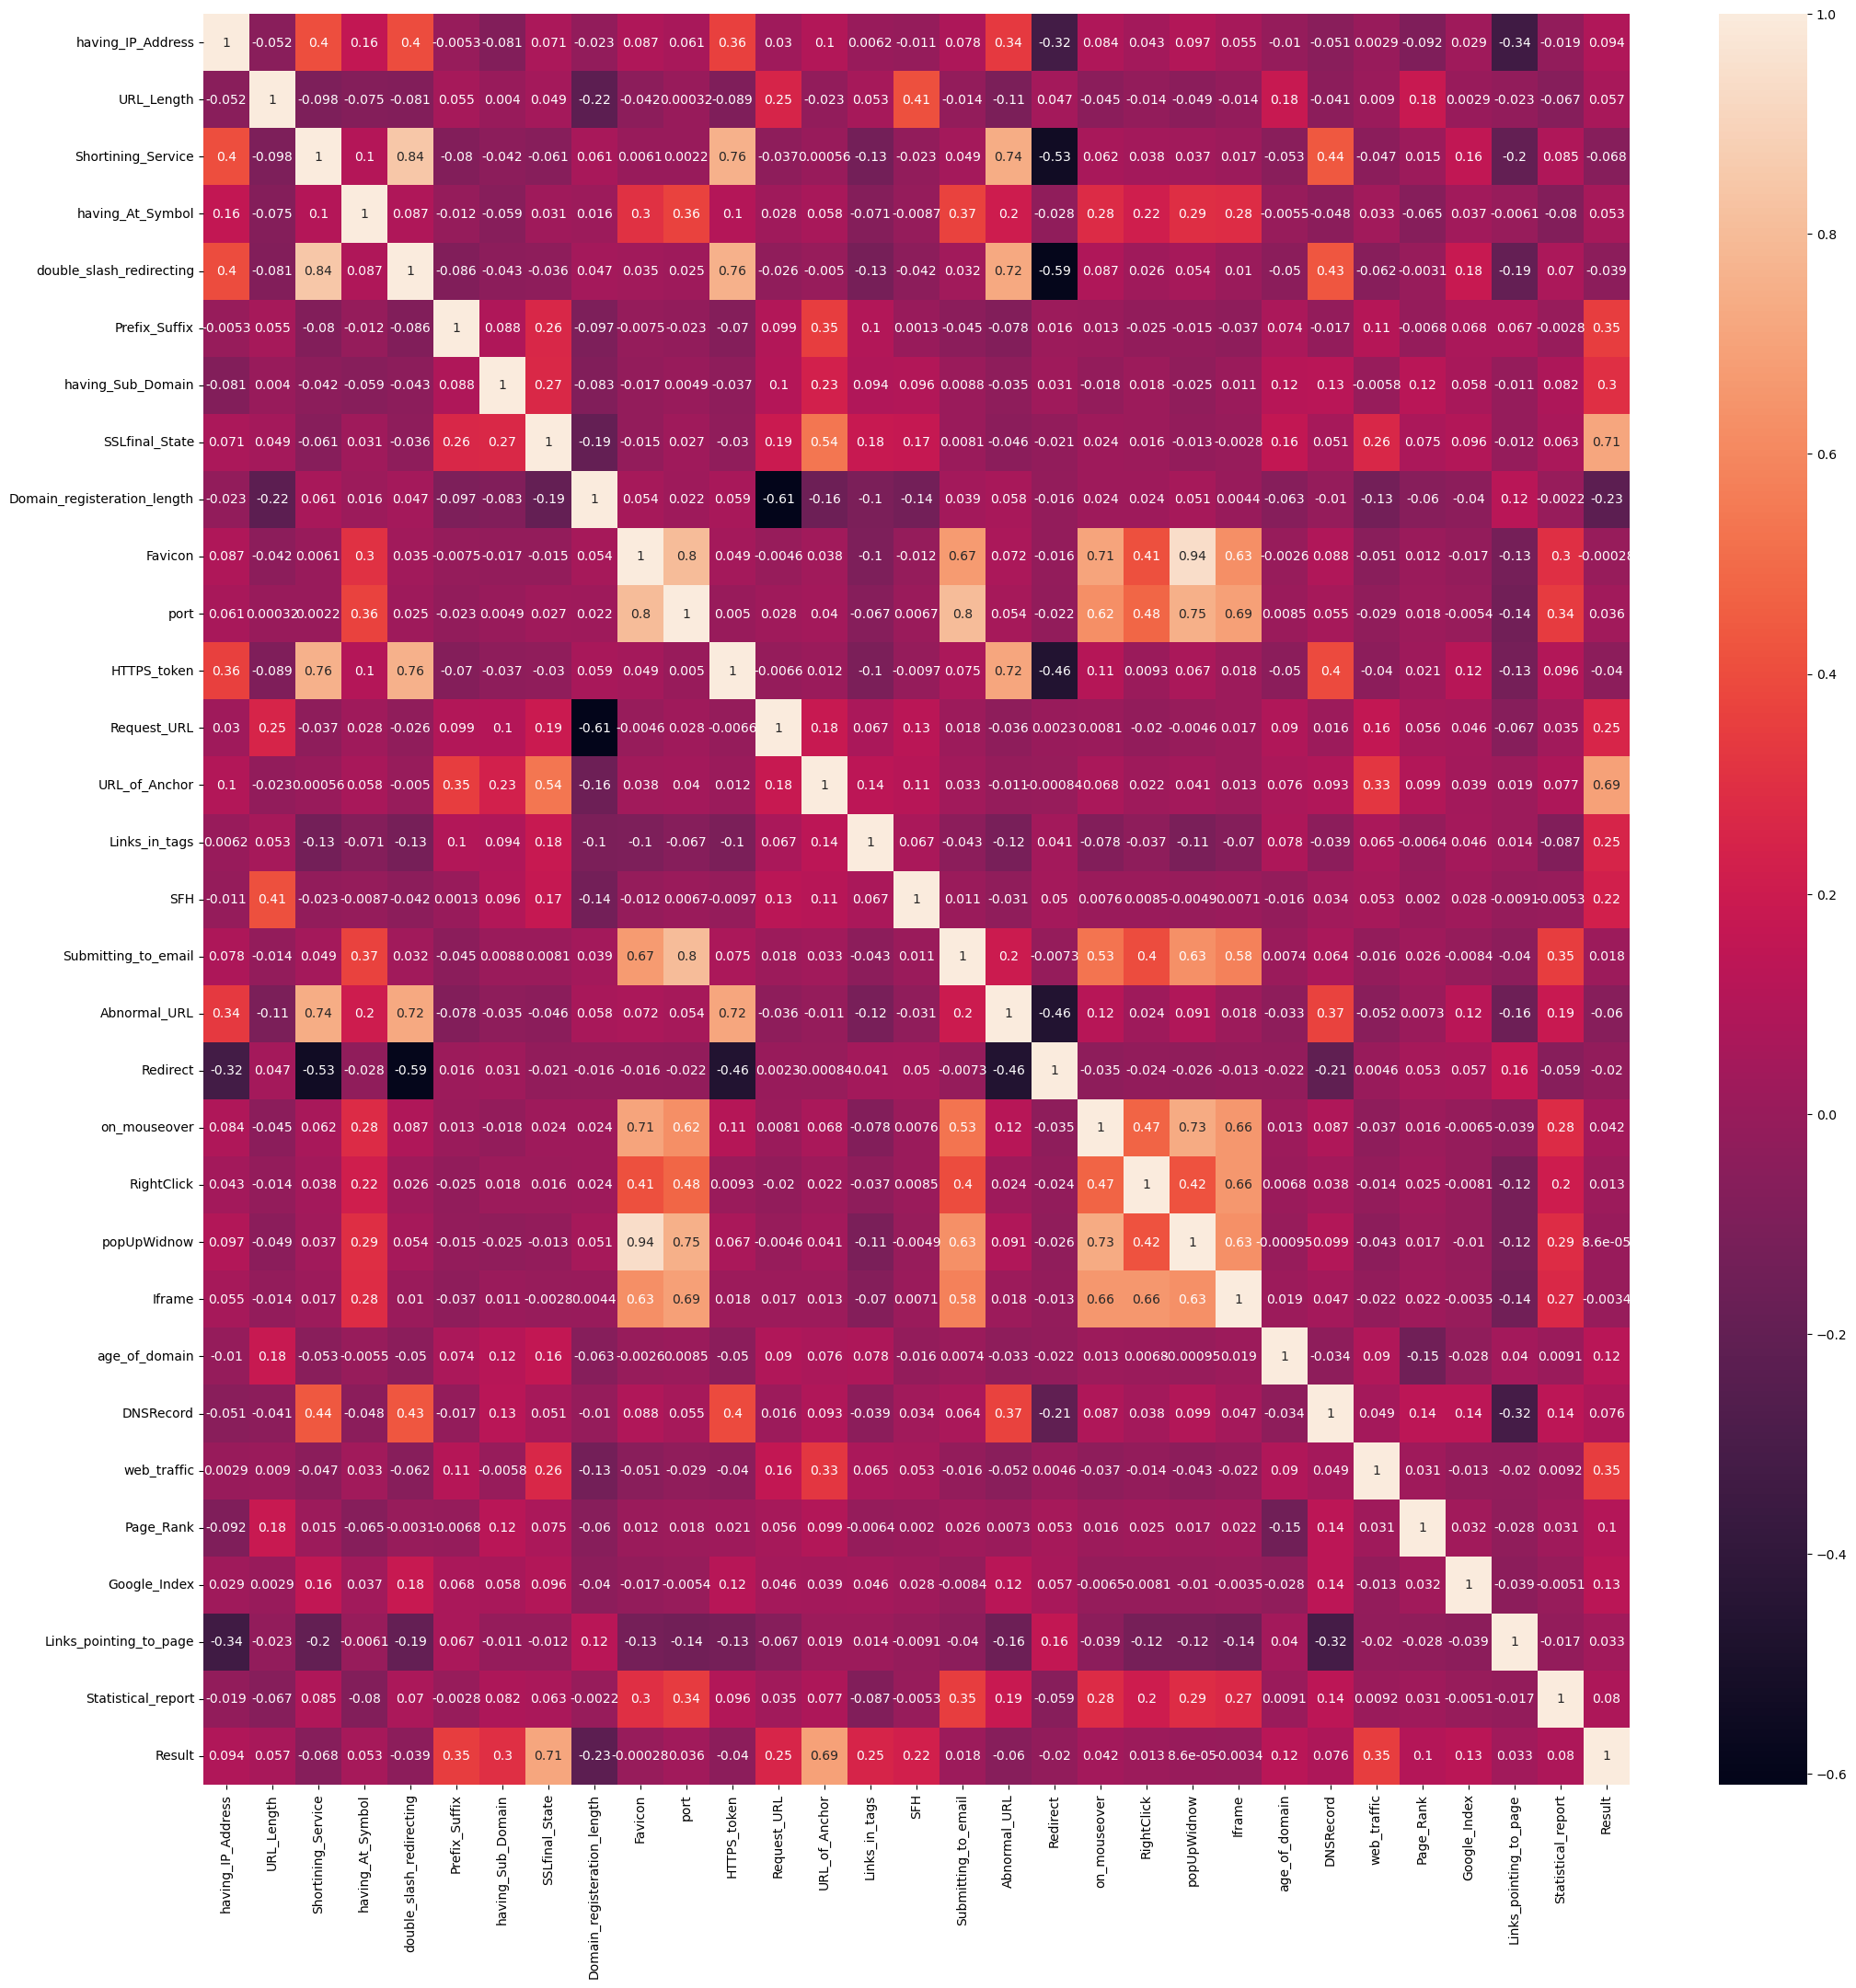

In [101]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(), annot=True)
plt.show()

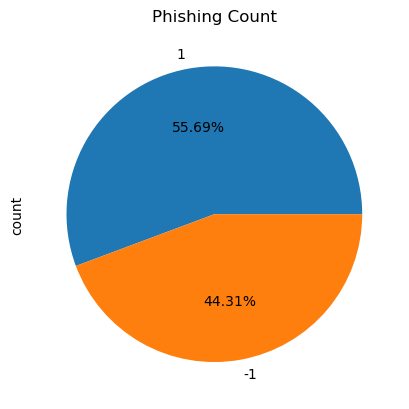

In [102]:
data['Result'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

In [103]:
X = data.drop(["Result"],axis =1)
y = data["Result"]

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((17688, 30), (17688,), (4422, 30), (4422,))

In [105]:
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

## Logistic Regression 

In [106]:
from sklearn.linear_model import LogisticRegression

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

LogisticRegression()

In [107]:
y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [108]:
acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.927
Logistic Regression : Accuracy on test Data: 0.925

Logistic Regression : f1_score on training Data: 0.936
Logistic Regression : f1_score on test Data: 0.933

Logistic Regression : Recall on training Data: 0.946
Logistic Regression : Recall on test Data: 0.935

Logistic Regression : precision on training Data: 0.925
Logistic Regression : precision on test Data: 0.930


In [109]:
print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

          -1       0.92      0.91      0.92      1964
           1       0.93      0.94      0.93      2458

    accuracy                           0.93      4422
   macro avg       0.92      0.92      0.92      4422
weighted avg       0.93      0.93      0.93      4422



In [110]:
storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

## Gradient Boosting Classifier

In [111]:
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)


GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [112]:
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [113]:
acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.986
Gradient Boosting Classifier : Accuracy on test Data: 0.981

Gradient Boosting Classifier : f1_score on training Data: 0.988
Gradient Boosting Classifier : f1_score on test Data: 0.983

Gradient Boosting Classifier : Recall on training Data: 0.992
Gradient Boosting Classifier : Recall on test Data: 0.987

Gradient Boosting Classifier : precision on training Data: 0.984
Gradient Boosting Classifier : precision on test Data: 0.979


In [114]:
print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.98      0.97      0.98      1964
           1       0.98      0.99      0.98      2458

    accuracy                           0.98      4422
   macro avg       0.98      0.98      0.98      4422
weighted avg       0.98      0.98      0.98      4422



In [115]:
storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

In [116]:
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [117]:
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.925,0.933,0.946,0.925
1,Gradient Boosting Classifier,0.981,0.983,0.992,0.984


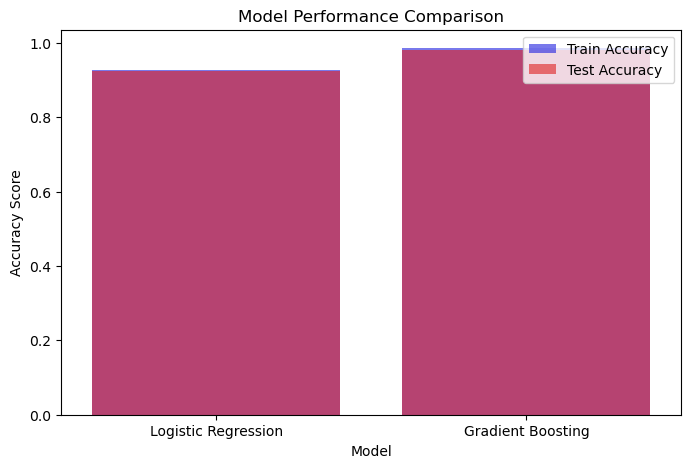

In [118]:
models = ["Logistic Regression", "Gradient Boosting"]
train_acc = [acc_train_log, acc_train_gbc]  # Replace with actual variables
test_acc = [acc_test_log, acc_test_gbc]

# Create a DataFrame for visualization
acc_df = pd.DataFrame({"Model": models, "Train Accuracy": train_acc, "Test Accuracy": test_acc})

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="Train Accuracy", data=acc_df, label="Train Accuracy", color="blue", alpha=0.6)
sns.barplot(x="Model", y="Test Accuracy", data=acc_df, label="Test Accuracy", color="red", alpha=0.6)

plt.ylabel("Accuracy Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.show()

## Testing the Model

In [119]:
import joblib
joblib.dump(log, "phishing_model.pkl")  # Save the trained model


['phishing_model.pkl']

In [120]:
model = joblib.load("phishing_model.pkl")


In [128]:
def check_url():
    """Asks user for a URL and predicts phishing probability."""
    url = input("Enter a URL to check: ").strip()
    if not url:
        print("⚠️ Please enter a valid URL.")
        return

    # Extract features correctly
    features = extract_features(url)  

    # Fix the probability calculation
    phishing_prob = model.predict_proba(features)[:, 0][0]  # Probability of phishing (-1)

    print(f"\n🔍 Phishing Probability: {phishing_prob * 100:.2f}%")
    
    if phishing_prob > 0.5:
        print("🚨 Warning: This URL is likely a PHISHING site!")
    else:
        print("✅ This URL seems SAFE.")

# Run the function
check_url()


Enter a URL to check:  https://leetcode.com/problemset/



🔍 Phishing Probability: 0.00%
✅ This URL seems SAFE.


In [125]:
## Feature Extracter

In [129]:
import re
import socket
import whois
import requests
import numpy as np
import joblib
from urllib.parse import urlparse
from datetime import datetime
from bs4 import BeautifulSoup

# Load trained model
try:
    model = joblib.load("phishing_model.pkl")
except FileNotFoundError:
    print("Error: Model file 'phishing_model.pkl' not found. Train and save the model first.")
    exit()

# Feature names
feature_names = [
    "having_IP_Address", "URL_Length", "Shortining_Service", "having_At_Symbol",
    "double_slash_redirecting", "Prefix_Suffix", "having_Sub_Domain",
    "SSLfinal_State", "HTTPS_token", "Redirect", "on_mouseover", "RightClick",
    "Iframe", "Domain_Age", "Domain_End", "Web_Traffic", "Google_Index",
    "Page_Rank", "Links_Pointing", "Statistical_Report", "URL_of_Anchor",
    "SFH", "Submitting_to_Email", "Abnormal_URL", "DNS_Record", "Favicon",
    "Port", "HTTPS_in_URL", "Request_URL", "Anchor_URL"
]

def is_private_ip(ip):
    """Checks if an IP address is private."""
    private_ranges = [
        ("10.", "10.255.255.255"),
        ("172.16.", "172.31.255.255"),
        ("192.168.", "192.168.255.255"),
        ("127.", "127.255.255.255")  # Loopback range
    ]
    return any(ip.startswith(prefix) for prefix, _ in private_ranges)

def get_domain_age(domain):
    """Returns domain age in months. If unavailable, returns (-1, -1)."""
    try:
        domain_info = whois.whois(domain)
        creation_date = domain_info.creation_date
        expiration_date = domain_info.expiration_date

        if isinstance(creation_date, list):
            creation_date = creation_date[0]
        if isinstance(expiration_date, list):
            expiration_date = expiration_date[0]

        if creation_date and expiration_date:
            domain_age = (datetime.now() - creation_date).days // 30
            domain_end = (expiration_date - datetime.now()).days // 30
            return domain_age, domain_end
    except Exception as e:
        print(f"⚠️ WHOIS lookup failed for {domain}: {e}")
    
    return -1, -1  # Ensure function always returns a tuple


def get_alexa_rank(domain):
    """Returns Alexa rank (Web Traffic)."""
    try:
        response = requests.get(f"https://www.alexa.com/minisiteinfo/{domain}")
        soup = BeautifulSoup(response.text, "html.parser")
        rank = soup.find("strong", class_="metrics-data")
        return int(rank.text.replace(",", "")) if rank else -1
    except:
        return -1  # Unable to fetch Alexa rank

def extract_features(url):
    """Extracts all 30 features for phishing detection."""
    parsed_url = urlparse(url)
    domain = parsed_url.netloc
    path = parsed_url.path

    # Feature extraction
    features = {
        "having_IP_Address": 1 if re.match(r"^\d{1,3}(\.\d{1,3}){3}$", domain) else 0,
        "URL_Length": len(url),
        "Shortining_Service": 1 if any(short in url for short in ["bit.ly", "tinyurl", "goo.gl"]) else 0,
        "having_At_Symbol": 1 if "@" in url else 0,
        "double_slash_redirecting": 1 if "//" in path else 0,
        "Prefix_Suffix": 1 if "-" in domain else 0,
        "having_Sub_Domain": domain.count('.') - 1,
        "SSLfinal_State": 1 if parsed_url.scheme == "https" else 0,
        "HTTPS_token": 1 if "https" in domain else 0,
        "Redirect": url.count("//"),
        "on_mouseover": 0,  # Cannot be detected from URL alone
        "RightClick": 0,  # Cannot be detected from URL alone
        "Iframe": 0,  # Cannot be detected from URL alone
        "Page_Rank": 1,  # Placeholder (requires additional service)
        "Links_Pointing": 1,  # Placeholder (requires web scraping)
        "Statistical_Report": 0,  # Placeholder
        "URL_of_Anchor": 0,  # Placeholder
        "SFH": 0,  # Placeholder
        "Submitting_to_Email": 0,  # Placeholder
        "Abnormal_URL": 0,  # Placeholder
        "Favicon": 1,  # Placeholder
        "Port": 1 if parsed_url.port in [80, 443, None] else 0,  # Checks if the port is standard (80, 443)
        "HTTPS_in_URL": 1 if "https" in url.lower() else 0,
        "Request_URL": 0,  # Placeholder
        "Anchor_URL": 0,  # Placeholder
        "Google_Index": 1 if requests.get(f"https://www.google.com/search?q=site:{domain}").status_code == 200 else 0,
        "DNS_Record": 1 if socket.gethostbyname(domain) else 0
    }

    # Domain Age & Expiry
    domain_age, domain_end = get_domain_age(domain)
    features["Domain_Age"] = domain_age
    features["Domain_End"] = domain_end

    # Web Traffic (Alexa Rank)
    features["Web_Traffic"] = get_alexa_rank(domain)

    # Convert features into NumPy array
    feature_values = np.array([features[feat] for feat in feature_names]).reshape(1, -1)
    return feature_values

def check_url():
    """Asks user for a URL and predicts phishing probability."""
    url = input("Enter a URL to check: ").strip()
    if not url:
        print("⚠️ Please enter a valid URL.")
        return

    features = extract_features(url)
    phishing_prob = model.predict_proba(features)[:, 0][0]  # Select column 0 for phishing probability (-1 class)

    print(f"\n🔍 Phishing Probability: {phishing_prob * 100:.2f}%")
    if phishing_prob > 0.5:
        print("🚨 Warning: This URL is likely a PHISHING site!")
    else:
        print("✅ This URL seems SAFE.")

# Run the function
check_url()


Enter a URL to check:  https://leetcode.com/problemset/



🔍 Phishing Probability: 0.00%
✅ This URL seems SAFE.
